<a href="https://colab.research.google.com/github/aritradey97/QuickDrawApp/blob/master/Quick_draw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing necessary packages

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras.utils import to_categorical
import cv2
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import urllib.request
import os
import glob
from random import randint
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


# Downloading the data

In [2]:
!wget 'https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt'

--2019-10-04 16:20:17--  https://raw.githubusercontent.com/zaidalyafeai/zaidalyafeai.github.io/master/sketcher/mini_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 760 [text/plain]
Saving to: ‘mini_classes.txt’

mini_classes.txt    100%[===================>]     760  --.-KB/s    in 0s      

2019-10-04 16:20:18 (165 MB/s) - ‘mini_classes.txt’ saved [760/760]



In [0]:
f = open("mini_classes.txt","r")
# And for reading use
classes = f.readlines()
f.close()

In [4]:
classes = [c.replace('\n','').replace(' ','_') for c in classes]
classes

['drums',
 'sun',
 'laptop',
 'anvil',
 'baseball_bat',
 'ladder',
 'eyeglasses',
 'grapes',
 'book',
 'dumbbell',
 'traffic_light',
 'wristwatch',
 'wheel',
 'shovel',
 'bread',
 'table',
 'tennis_racquet',
 'cloud',
 'chair',
 'headphones',
 'face',
 'eye',
 'airplane',
 'snake',
 'lollipop',
 'power_outlet',
 'pants',
 'mushroom',
 'star',
 'sword',
 'clock',
 'hot_dog',
 'syringe',
 'stop_sign',
 'mountain',
 'smiley_face',
 'apple',
 'bed',
 'shorts',
 'broom',
 'diving_board',
 'flower',
 'spider',
 'cell_phone',
 'car',
 'camera',
 'tree',
 'square',
 'moon',
 'radio',
 'hat',
 'pizza',
 'axe',
 'door',
 'tent',
 'umbrella',
 'line',
 'cup',
 'fan',
 'triangle',
 'basketball',
 'pillow',
 'scissors',
 't-shirt',
 'tooth',
 'alarm_clock',
 'paper_clip',
 'spoon',
 'microphone',
 'candle',
 'pencil',
 'envelope',
 'saw',
 'frying_pan',
 'screwdriver',
 'helmet',
 'bridge',
 'light_bulb',
 'ceiling_fan',
 'key',
 'donut',
 'bird',
 'circle',
 'beard',
 'coffee_cup',
 'butterfly',
 

In [0]:
def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  for c in classes:
    cls_url = c.replace('_', '%20')
    path = base+cls_url+'.npy'
    print(path)
    urllib.request.urlretrieve(path, c +'.npy')

In [6]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/drums.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/sun.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/laptop.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/anvil.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/baseball%20bat.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ladder.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/eyeglasses.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/grapes.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/book.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/dumbbell.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/traffic%20light.npy
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/wristwatch.npy
https://storage.googleapis.com/quickdraw_dat

##Load 20% of the data and train it

In [0]:
def load_data(root, vfold_ratio=0.2, max_items_per_class= 4000 ):
    all_files = glob.glob(os.path.join(root, '*.npy'))

    #initialize variables 
    x = np.empty([0, 784])
    y = np.empty([0])
    class_names = []

    #load each data file 
    for idx, file in enumerate(all_files):
        data = np.load(file)
        data = data[0: max_items_per_class, :]
        labels = np.full(data.shape[0], idx)

        x = np.concatenate((x, data), axis=0)
        y = np.append(y, labels)

        class_name, ext = os.path.splitext(os.path.basename(file))
        class_names.append(class_name)

    data = None
    labels = None
    
    #randomize the dataset 
    permutation = np.random.permutation(y.shape[0])
    x = x[permutation, :]
    y = y[permutation]

    #separate into training and testing 
    vfold_size = int(x.shape[0]/100*(vfold_ratio*100))

    x_test = x[0:vfold_size, :]
    y_test = y[0:vfold_size]

    x_train = x[vfold_size:x.shape[0], :]
    y_train = y[vfold_size:y.shape[0]]
    return x_train, y_train, x_test, y_test, class_names

# Splitting data into train and test

In [0]:
x_train, y_train, x_test, y_test, class_names = load_data('/content/')
num_classes = len(class_names)
image_size = 28

In [9]:
x_train.shape

(320000, 784)

In [10]:
num_classes

100

envelope


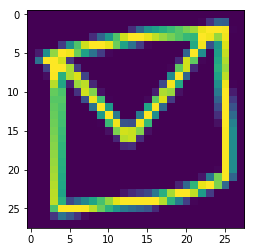

In [11]:
%matplotlib inline  
idx = randint(0, len(x_train))
plt.imshow(x_train[idx].reshape(28,28)) 
print(class_names[int(y_train[idx].item())])

# Normalizing the data

In [0]:
# Reshape and normalize
x_train = x_train.reshape(x_train.shape[0], image_size, image_size, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], image_size, image_size, 1).astype('float32')

x_train /= 255.0
x_test /= 255.0

# Convert class vectors to class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Model building

In [13]:
model = Sequential([
    Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(32, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation = 'softmax')
])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'top_k_categorical_accuracy'])

In [16]:
model.fit(
    x = x_train,
    y = y_train,
    epochs=15,
    validation_split=0.1,
    batch_size=256
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 288000 samples, validate on 32000 samples
Epoch 1/15
288000/288000 [==============================] - 23s 79us/step - loss: 2.1074 - acc: 0.4859 - top_k_categorical_accuracy: 0.7474 - val_loss: 1.3997 - val_acc: 0.6483 - val_top_k_categorical_accuracy: 0.8714
Epoch 2/15
288000/288000 [==============================] - 15s 52us/step - loss: 1.3993 - acc: 0.6442 - top_k_categorical_accuracy: 0.8727 - val_loss: 1.1789 - val_acc: 0.7035 - val_top_k_categorical_accuracy: 0.8978
Epoch 3/15
288000/288000 [==============================] - 15s 52us/step - loss: 1.2446 - acc: 0.6817 - top_k_categorical_accuracy: 0.8927 - val_loss: 1.0737 - val_acc: 0.7308 - val_top_k_categorical_accuracy: 0.9093
Epoch 4/15
288000/288000 [==============================] - 15s 52us/step - loss: 1.1626 - acc: 0.7027 - top_k_categorical_accuracy: 0.9022 - val_loss: 1.0208 - val_acc: 0.7455 - val_top_k_categorical_

In [17]:
model.evaluate(
    x_test,
    y_test
)

80000/80000 [==============================] - 6s 76us/step


[0.8753908132135868, 0.7768875, 0.93055]

# Saving the trained model

In [0]:
model.save('model_cnn_quickdraw.h5')

In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model_file('model_cnn_quickdraw.h5')
tflite_model = converter.convert()
open('quickdraw.tflite', 'wb').write(tflite_model)

Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


422244

In [0]:
try:
    from google.colab import files
    files.download('quickdraw.tflite')
except:
    print("Skip downloading")

In [0]:
with open("quickdraw_labels.txt", "w") as output:
    output.write(str(classes))

In [0]:
try:
    from google.colab import files
    files.download('quickdraw_labels.txt')
except:
    print("Skip downloading")